<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Simulacion_goles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRERIAS**

In [887]:
import pandas as pd
import numpy as np
from statistics import mean
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tabulate import tabulate

# **BASE DE DATOS**

In [888]:
# df -> Base de datos
df=pd.read_excel("Datos.xlsx")

In [889]:
# Mostrar la base de datos
df

,Sem.,Local,xG,Marcador,Gol-Local,Gol-Visitante,xG.1,Visitante
0,1,Necaxa,0.5,0–3,0,3,2.0,UANL
1,1,UNAM,0.7,3–2,3,2,0.8,Querétaro
2,1,Tijuana,1.6,3–1,3,1,1.0,Atlas
3,1,Guadalajara,0.6,0–0,0,0,1.1,León
4,1,Cruz Azul,2.3,2–0,2,0,0.3,Santos
...,...,...,...,...,...,...,...,...
1219,17,UANL,3.1,4–1,4,1,0.8,Tijuana
1220,17,Pachuca,1.5,1–1,1,1,0.9,Mazatlán
1221,17,Atlas,0.4,0–1,0,1,1.2,Guadalajara
1222,17,Necaxa,1.2,2–5,2,5,1.5,Monterrey


In [890]:
# Extraemos las columnas de la base de datos
Equipos_locales=df["Local"]
Equipos_visitantes=df["Visitante"]
Goles_locales=df["Gol-Local"]
Goles_visitantes=df["Gol-Visitante"]
Goles_esp_locales=df["xG"]
Goles_esp_visitantes=df["xG.1"]


# **EQUIPOS DE LA LIGA MX**

In [891]:
#Lista de los equipos que forman parte de la Liga MX
Equipos=df["Local"].unique()
print(Equipos)

['Necaxa' 'UNAM' 'Tijuana' 'Guadalajara' 'Cruz Azul' 'Atlético' 'Pachuca'
 'Mazatlán' 'Monterrey' 'Puebla' 'FC Juárez' 'Toluca' 'Querétaro' 'UANL'
 'América' 'Santos' 'Atlas' 'León']


# **JUSTIFICACIÓN DEL USO DE LA DISTRIBUCCIÓN DE POISSON**

La distribución de Poisson es adecuada para modelar eventos que ocurren de manera aleatoria e independiente en intervalos de tiempo o espacio, y es particularmente útil cuando estos eventos son relativamente poco frecuentes pero posibles en grandes cantidades. En el contexto de los partidos de fútbol, los goles anotados durante un partido pueden considerarse como eventos aleatorios que ocurren a lo largo del tiempo, y su frecuencia no sigue un patrón perfectamente regular.

Media de goles locales: 1.46
Media de goles visitantes: 1.17


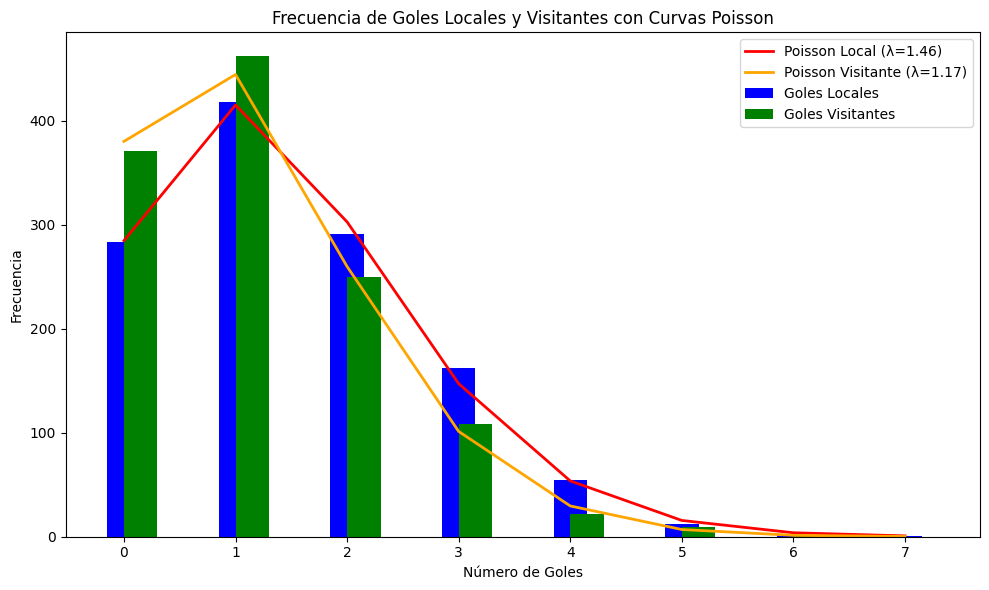

In [892]:
# Datos
Goles_partido = [0, 1, 2, 3, 4, 5, 6, 7]
Gol_locales = [283, 418, 291, 162, 55, 12, 2, 1]
Gol_visitantes = [371, 462, 250, 108, 22, 9, 2, 0]

# Calcular las medias
media_local = np.mean(Goles_locales)
media_visitante = np.mean(Goles_visitantes)

# Imprimir las medias
print(f"Media de goles locales: {round(media_local,2)}")
print(f"Media de goles visitantes: {round(media_visitante,2)}")

# Distribución Poisson para goles locales y visitantes
Loc = ss.poisson(media_local)
Vis = ss.poisson(media_visitante)

# Crear el gráfico de barras para goles locales y visitantes
plt.figure(figsize=(10, 6))

# Gráfico para goles locales (en azul)
plt.bar(Goles_partido, Gol_locales, color='blue', width=0.3, label='Goles Locales', align='center')

# Gráfico para goles visitantes (en verde)
plt.bar(Goles_partido, Gol_visitantes, color='green', width=0.3, label='Goles Visitantes', align='edge')

# Superponer las curvas Poisson para goles locales y visitantes
plt.plot(Goles_partido, Loc.pmf(Goles_partido) * sum(Gol_locales), 'r-', lw=2, label=f'Poisson Local (λ={media_local:.2f})')
plt.plot(Goles_partido, Vis.pmf(Goles_partido) * sum(Gol_visitantes), 'orange', lw=2, label=f'Poisson Visitante (λ={media_visitante:.2f})')

# Título y etiquetas
plt.title('Frecuencia de Goles Locales y Visitantes con Curvas Poisson')
plt.xlabel('Número de Goles')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [893]:
Ventaja_local=media_local/media_visitante
print("La ventaja que tienen los equipos locales sobre los visitantes es de",Ventaja_local)

La ventaja que tienen los equipos locales sobre los visitantes es de 1.2473794549266246


# **CALCULAR LA FUERZA ATACANTE Y DEFENSIVA DE CADA EQUIPO**

**Cómo calcular la Fuerza atacante**

El primer paso para calcular la fuerza atacante basándose en los resultados de las últimas 8 temporadas consiste en determinar la media de goles marcados por equipo por partido en casa..

La relación entre la media de goles marcados por equipo por partido en casa y la media de goles marcados por partido en casa de la liga es lo que constituye la *fuerza atacante*.

**Cómo calcular la Fuerza defensiva**

El primer paso para calcular la fuerza defensiva basándose en los resultados de las últimas 8 temporadas consiste en determinar la media de goles marcados por equipo por partido fuera de casa.

La relación entre la media de goles marcados por equipo por partido fuera de casa y la media de goles marcados por partido fuera de casa de la liga es lo que constituye la *fuerza defensiva*.

In [894]:
# Lista para almacenar goles de cada equipo como local
Goles_loc = []
# Lista para almacenar goles de cada equipo como visitante
Goles_vis = []
# Lista para almacenar la suma de goles totales (local + visitante)
Goles_totales = []
#Lista para almacenar los goles esperados
Goles_esperados=[]

# Recorremos todos los equipos en la lista Equipos
for j in range(18):
    # Encuentra los índices de los partidos donde el equipo j juega como local y como visitante
    indices_loc = [indice for indice, dato in enumerate(Equipos_locales) if dato == Equipos[j]]
    indices_vis = [indice for indice, dato in enumerate(Equipos_visitantes) if dato == Equipos[j]]

    # Inicializamos los goles de este equipo en 0
    gol_equipo_local = 0
    gol_equipo_visitante = 0

    # Sumamos los goles cuando el equipo juega como local
    for i in range(len(indices_loc)):
        gol_equipo_local += Goles_locales[indices_loc[i]]

    # Sumamos los goles cuando el equipo juega como visitante
    for i in range(len(indices_vis)):
        gol_equipo_visitante += Goles_visitantes[indices_vis[i]]

    # Agregamos los goles como local y visitante a las listas correspondientes
    Goles_loc.append(gol_equipo_local)
    Goles_vis.append(gol_equipo_visitante)


# Imprimimos los goles de cada equipo como local, visitante
print("Goles como local:", Goles_loc)
print("Goles como visitante:", Goles_vis)
#Calculamos la fuerza atacante y la fuerza defensiva
#------FUERZA ATACANTE
media_goles_liga_loc=round(sum(Goles_loc)/1224,2)
Goles_loc = list(map(lambda x: round(x /68,2), Goles_loc))
Fuerza_atacante= list(map(lambda x: round(x /media_goles_liga_loc,2), Goles_loc))
#------FUERZA DEFENSIVA
media_goles_liga_vis=round(sum(Goles_vis)/1224,2)
Goles_vis = list(map(lambda x: round(x /68,2), Goles_vis))
Fuerza_defensiva= list(map(lambda x: round(x /media_goles_liga_vis,2), Goles_vis))

Goles como local: [79, 110, 89, 93, 99, 88, 102, 90, 114, 93, 73, 128, 84, 116, 135, 114, 73, 105]
Goles como visitante: [71, 69, 53, 79, 82, 75, 95, 73, 97, 88, 57, 86, 61, 96, 108, 83, 80, 78]


In [895]:
Tabla=[]
for i in range(18):
  # D_equipo -> Datos y resultados de cada equipo
  D_equipo=[Equipos[i],Goles_loc[i],media_goles_liga_loc,Fuerza_atacante[i],Goles_vis[i],media_goles_liga_vis,Fuerza_defensiva[i]]
  Tabla.append(D_equipo)
# Imprimimos tabla
print(tabulate(Tabla,headers=["Equipo","Media local","Media local de liga","Fuerza atacante","Media visitante","Media visitante de liga","Fuerza defensiva"]))


Equipo         Media local    Media local de liga    Fuerza atacante    Media visitante    Media visitante de liga    Fuerza defensiva
-----------  -------------  ---------------------  -----------------  -----------------  -------------------------  ------------------
Necaxa                1.16                   1.46               0.79               1.04                       1.17                0.89
UNAM                  1.62                   1.46               1.11               1.01                       1.17                0.86
Tijuana               1.31                   1.46               0.9                0.78                       1.17                0.67
Guadalajara           1.37                   1.46               0.94               1.16                       1.17                0.99
Cruz Azul             1.46                   1.46               1                  1.21                       1.17                1.03
Atlético              1.29                   1.46      

# **SIMULACIÓN DEL EQUIPO GANADOR DE LA LIGA MX "APERTURA 2024"**

 **Equipos clasificados antes del repechaje**

In [896]:
# LISTA DE EQUIPOS CLASIFICADOS
E_CLASIFICADOS=['Cruz Azul','Toluca','UANL','UNAM','Monterrey','Atlético']
Ind=[4,12,14,1,8,5]

**Equipos que pueden clasificar en el repechaje**

In [897]:
#PARTIDOS PARA CLASIFICAR
# --- Guadajara vs Atlas y Tijuana vs America
Locales=["Tijuana","Guadalajara"]
Visitantes=["América","Atlas"]

## **FUNCIONES PARA SIMULAR LOS RESULTADOS DE LOS PARTIDOS**


***Función que calcula el resultado de un solo partido***

In [898]:
def Resultados(equipo_local,equipo_visitante):

  Equipos_list = Equipos.tolist() if isinstance(Equipos, np.ndarray) else Equipos
  ind_loc=Equipos_list.index(equipo_local)
  ind_vis=Equipos_list.index(equipo_visitante)

  # Número probable de goles que quizás marque el local:
  # (Fuerza atacante del local)*(Fuerza defensiva del visitante)*(Media de goles marcados como local en la Liga MX)
  media_goles_local = Fuerza_atacante[ind_loc]*Fuerza_defensiva[ind_vis]*media_goles_liga_loc

  # Número probable de goles que quizás marque el visitante:
  # (Fuerza atacante del visitante)*(Fuerza defensiva del local)*(Media de goles marcados como visitante en la Liga MX)
  media_goles_visitante = Fuerza_atacante[ind_vis]*Fuerza_defensiva[ind_loc]*media_goles_liga_vis
  # Simular los goles anotados por el equipo local y el equipo visitante
  goles_local = np.random.poisson(media_goles_local)
  goles_visitante = np.random.poisson(media_goles_visitante)

  # Mostrar el resultado de la simulación
  # --- NOTA : SI EL PARTIDO QUEDA EMPATADO PASA EL EQUIPO CON MEJOR POSICION (LOCAL EN EL PARTIDO DE VUELTA)
  if goles_local>=goles_visitante:
    ganador=equipo_local
    perdedor=equipo_visitante
  else:
    ganador=equipo_visitante
    perdedor=equipo_local
    # Retorna el resultado del partido
  return [ganador,perdedor]

***Función que calcula el resultado de los partidos ida y vuelta***

In [899]:
def Resultados_IV(equipo_local,equipo_visitante):
  #equipo_local -> Equipo en mejor posicion
  #equipo_visitante -> Equipo en peor posicion
  Equipos_list = Equipos.tolist() if isinstance(Equipos, np.ndarray) else Equipos
  ind_loc=Equipos_list.index(equipo_local)
  ind_vis=Equipos_list.index(equipo_visitante)
  media_goles_local = Fuerza_atacante[ind_loc]*Fuerza_defensiva[ind_vis]*media_goles_liga_loc
  media_goles_visitante = Fuerza_atacante[ind_vis]*Fuerza_defensiva[ind_loc]*media_goles_liga_vis
  # Simular los goles anotados por el equipo local y el equipo visitante
  #Partido ida
  goles_local_1 = np.random.poisson(media_goles_visitante)
  goles_visitante_1 = np.random.poisson(media_goles_local)
  #Partido vuelta
  goles_local_2 = np.random.poisson(media_goles_local)
  goles_visitante_2 = np.random.poisson(media_goles_visitante)
  # Goles en ambos partidos
  goles_local=goles_visitante_1+goles_local_2
  goles_visitante=goles_local_1+goles_visitante_2
  # Mostrar el resultado de la simulación
  # --- NOTA : SI EL PARTIDO QUEDA EMPATADO PASA EL EQUIPO CON MEJOR POSICION (LOCAL EN EL PARTIDO DE VUELTA)
  if goles_local>=goles_visitante:
    ganador=equipo_local
    perdedor=equipo_visitante
  else:
    ganador=equipo_visitante
    perdedor=equipo_local
  return [ganador,perdedor]

## **EJEMPLO**

### **Simulación de los resultados del repechaje**

In [900]:
# Tijuana - América
# Res1 -> Resultado del partido entre Tijuana y América
Res1=Resultados(Locales[0],Visitantes[0])
# Clasificado 7 -> Equipo que clasifica en 7ma posición
E_CLASIFICADOS.append(Res1[0])
# Guadalajara - Atlas
# Res2 -> Resultado del partido entre Guadalajara y Atlas
Res2=Resultados(Locales[1],Visitantes[1])
# Res -> Resultado del partido entre el perdedor del partido (Tijuana - América) y el ganador del partido (Guadalajara - Atlas)
Res3=Resultados(Res1[1],Res2[0])
# Clasificado 8 -> Equipo que clasifica en 8va posición
E_CLASIFICADOS.append(Res3[0])

### **Equipos que entran a liguilla**


In [901]:
print("Los equipos que pasan a la liguilla son:")
print(E_CLASIFICADOS)

Los equipos que pasan a la liguilla son:
['Cruz Azul', 'Toluca', 'UANL', 'UNAM', 'Monterrey', 'Atlético', 'América', 'Guadalajara']


### **Simulación de los resultados de la liguilla**

***Cuartos de final***

In [902]:
# Cuartos de final
# Cuartos -> Se guardan los equipos que ganan sus partidos en los cuartos de final
Cuartos=["","","","","","","",""]

# 1 vs 8
# res4 -> Resultado entre el partido entre los equipos (1 y 8) de los clasificados
res4=Resultados_IV(E_CLASIFICADOS[0],E_CLASIFICADOS[7])
index_to_insert = E_CLASIFICADOS.index(res4[0])
Cuartos[index_to_insert] = res4[0]

# 2 vs 7
# res5 -> Resultado entre el partido entre los equipos (2 y 7) de los clasificados
res5=Resultados_IV(E_CLASIFICADOS[1],E_CLASIFICADOS[6])
index_to_insert = E_CLASIFICADOS.index(res5[0])
Cuartos[index_to_insert] = res5[0]

# 3 vs 6
# res6 -> Resultado entre el partido entre los equipos (3 y 6) de los clasificados
res6=Resultados_IV(E_CLASIFICADOS[2],E_CLASIFICADOS[5])
index_to_insert = E_CLASIFICADOS.index(res6[0])
Cuartos[index_to_insert] = res6[0]

# 4 vs 5
# res7 -> Resultado entre el partido entre los equipos (4 y 5) de los clasificados
res7=Resultados_IV(E_CLASIFICADOS[3],E_CLASIFICADOS[4])
index_to_insert = E_CLASIFICADOS.index(res7[0])
Cuartos[index_to_insert] = res7[0]



In [903]:
#Equipos que pasan a la semifinal
Cuartos=[elem for elem in Cuartos if elem]
print("Los equipos que pasan a la semifinal son:",Cuartos)

Los equipos que pasan a la semifinal son: ['Toluca', 'UANL', 'UNAM', 'Guadalajara']


***Semifinal***

In [904]:
# Semifinal
# Semifinal -> Se guardan los equipos que ganan sus partidos en la semifinal
Semifinal=["","","",""]

# 1 vs 4
# res8 -> Resultado entre el partido entre los equipos (1 y 4) de las semifinales
res8=Resultados_IV(Cuartos[0],Cuartos[3])
index_to_insert = Cuartos.index(res8[0])
Semifinal[index_to_insert] = res8[0]

# 2 vs 4
# res9 -> Resultado entre el partido entre los equipos (2 y 3) de las semifinales
res9=Resultados_IV(Cuartos[1],Cuartos[2])
index_to_insert = Cuartos.index(res9[0])
Semifinal[index_to_insert] = res9[0]

In [905]:
#Equipos que pasan a la final
Semifinal=[elem for elem in Semifinal if elem]
print("Los equipos que pasan a la final son:",Semifinal)

Los equipos que pasan a la final son: ['UNAM', 'Guadalajara']


***Final***

In [906]:
# Final

# 1 vs 2
# res10 -> Resultado entre el partido entre los equipos (1 y 2) de la final
res10=Resultados_IV(Semifinal[0],Semifinal[1])
index_to_insert = Semifinal.index(res10[0])
Final = res10[0]
print("El ganador es :",Final)

El ganador es : UNAM


# **FUNCIÓN QUE DETERMINA AL EQUIPO GANADOR DEL APERTURA 2024**

In [907]:
def Ganador():
    # LISTA DE EQUIPOS CLASIFICADOS
    E_CLASIFICADOS=['Cruz Azul','Toluca','UANL','UNAM','Monterrey','Atlético']
    # Repechaje

    # Tijuana - América
    # res1 -> Resultado del partido entre Tijuana y América
    res1=Resultados(Locales[0],Visitantes[0])
    # Clasificado 7 -> Equipo que clasifica en 7ma posición
    E_CLASIFICADOS.append(res1[0])
    # Guadalajara - Atlas
    # res2 -> Resultado del partido entre Guadalajara y Atlas
    res2=Resultados(Locales[1],Visitantes[1])
    # Res -> Resultado del partido entre el perdedor del partido (Tijuana - América) y el ganador del partido (Guadalajara - Atlas)
    res3=Resultados(res1[1],res2[0])
    # Clasificado 8 -> Equipo que clasifica en 8va posición
    E_CLASIFICADOS.append(res3[0])

    # Cuartos de final
    Cuartos=["","","","","","","",""]

    # 1 vs 8
    # res4 -> Resultado entre el partido entre los equipos (1 y 8) de los clasificados
    res4=Resultados_IV(E_CLASIFICADOS[0],E_CLASIFICADOS[7])
    index_to_insert = E_CLASIFICADOS.index(res4[0])
    Cuartos[index_to_insert] = res4[0]

    # 2 vs 7
    # res5 -> Resultado entre el partido entre los equipos (2 y 7) de los clasificados
    res5=Resultados_IV(E_CLASIFICADOS[1],E_CLASIFICADOS[6])
    index_to_insert = E_CLASIFICADOS.index(res5[0])
    Cuartos[index_to_insert] = res5[0]

    # 3 vs 6
    # res6 -> Resultado entre el partido entre los equipos (3 y 6) de los clasificados
    res6=Resultados_IV(E_CLASIFICADOS[2],E_CLASIFICADOS[5])
    index_to_insert = E_CLASIFICADOS.index(res6[0])
    Cuartos[index_to_insert] = res6[0]

    # 4 vs 5
    # res7 -> Resultado entre el partido entre los equipos (1 y 8) de los clasificados
    res7=Resultados_IV(E_CLASIFICADOS[3],E_CLASIFICADOS[4])
    index_to_insert = E_CLASIFICADOS.index(res7[0])
    Cuartos[index_to_insert] = res7[0]

    #Equipos que pasan a la semifinal
    Cuartos=[elem for elem in Cuartos if elem]

    # Semifinal
    Semifinal=["","","",""]

    # 1 vs 4
    # res8 -> Resultado entre el partido entre los equipos (1 y 4) de las semifinales
    res8=Resultados_IV(Cuartos[0],Cuartos[3])
    index_to_insert = Cuartos.index(res8[0])
    Semifinal[index_to_insert] = res8[0]

    # 2 vs 4
    # res9 -> Resultado entre el partido entre los equipos (2 y 3) de las semifinales
    res9=Resultados_IV(Cuartos[1],Cuartos[2])
    index_to_insert = Cuartos.index(res9[0])
    Semifinal[index_to_insert] = res9[0]

    #Equipos que pasan a la final
    Semifinal=[elem for elem in Semifinal if elem]

    # Final

    # 1 vs 2
    # res10 -> Resultado entre el partido entre los equipos (1 y 2) de la final
    res10=Resultados_IV(Semifinal[0],Semifinal[1])
    index_to_insert = Semifinal.index(res10[0])
    Ganador = res10[0]
    return Ganador

# **SIMULACIÓN DE N VECES AL GANADOR**

In [908]:
# N -> Numero de simulaciones para obtener un ganador
N=100000
# Ganadores -> Lista que guarda el gaandor de cada simulación
Ganadores=[]
for i in range(N):
  # Se agrega al ganador la simulación "i"
  Ganadores.append(Ganador())
# conteo -> Almacena el número de veces que cada equipo fue ganador
conteo=Counter(Ganadores)
# Frecuencias -> Lista de las frecuencias de cada equipo para gráficar
Frecuencias=[conteo['Cruz Azul'],conteo['Toluca'],conteo['UANL'],conteo['UNAM'],conteo['Monterrey'],conteo['Atlético'],conteo['Tijuana'],conteo['América'],conteo['Guadalajara'],conteo['Atlas']]
# Equipos -> Lista de equipos que pueden ser los posibles ganadores
Equipos_ganadores = ['Cruz Azul', 'Toluca', 'UANL', 'UNAM', 'Monterrey', 'Atlético', 'Tijuana', 'América', 'Guadalajara', 'Atlas']

## **Tabla y gráfica de frecuencias**

  Cruz Azul    Toluca    UANL    UNAM    Monterrey    Atlético    Tijuana    América    Guadalajara    Atlas
-----------  --------  ------  ------  -----------  ----------  ---------  ---------  -------------  -------
      24414     29221   12516   20185         2607        2650       6273       1729            382       23


Text(0, 0.5, 'Frecuencia')

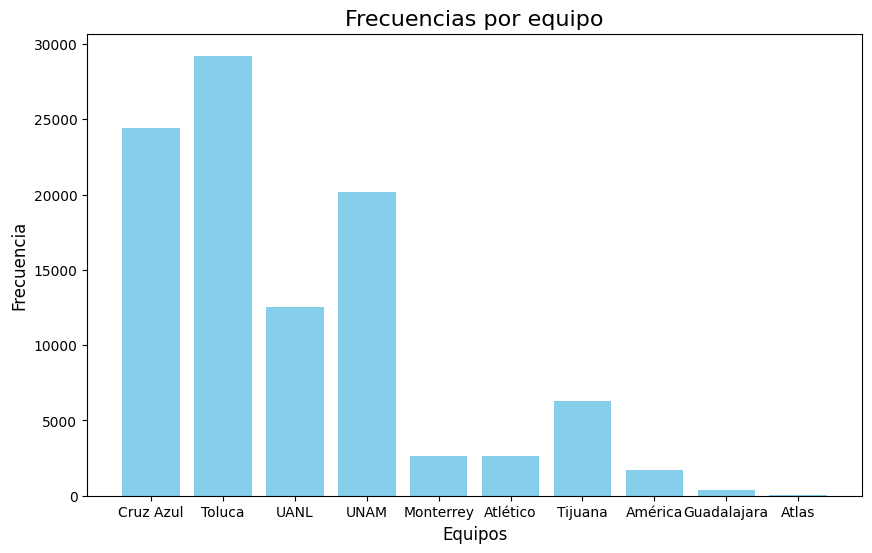

In [909]:
# TABLA
Frecuencia=[Frecuencias]
print(tabulate(Frecuencia,headers=['Cruz Azul', 'Toluca', 'UANL', 'UNAM', 'Monterrey', 'Atlético', 'Tijuana', 'América', 'Guadalajara', 'Atlas']))
# GRÁFICA
plt.figure(figsize=(10, 6))
plt.bar(Equipos_ganadores, Frecuencias, color='skyblue')
plt.title('Frecuencias por equipo', fontsize=16)
plt.xlabel('Equipos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

## **Tabla y gráfica de probabilidades**

  Cruz Azul    Toluca    UANL    UNAM    Monterrey    Atlético    Tijuana    América    Guadalajara    Atlas
-----------  --------  ------  ------  -----------  ----------  ---------  ---------  -------------  -------
     0.2441    0.2922  0.1252  0.2019       0.0261      0.0265     0.0627     0.0173         0.0038   0.0002


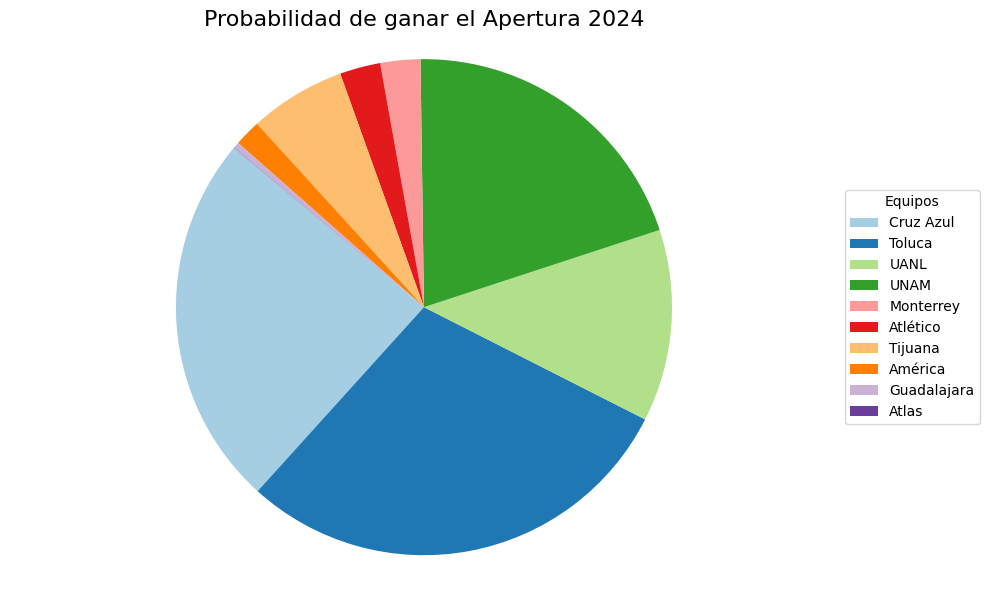

In [910]:
# TABLA
probabilidades=[]
for i in range(10):
  prob=round((int(Frecuencia[0][i])/N),4)
  probabilidades.append(str(prob))
TABLA=[['Cruz Azul', 'Toluca', 'UANL', 'UNAM', 'Monterrey', 'Atlético', 'Tijuana', 'América', 'Guadalajara', 'Atlas'],probabilidades]
print(tabulate(TABLA, headers="firstrow"))
# GRÁFICA
plt.figure(figsize=(10, 6))
colores = plt.cm.Paired.colors
plt.pie(Frecuencias, startangle=140, colors=colores)
plt.legend(Equipos_ganadores, title="Equipos", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Probabilidad de ganar el Apertura 2024', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()
